In [1]:
import json
import gzip
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
import itertools 

In [2]:
from Amazon_preprocess import DataSetPreprocessor, TextPreprocessor

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anutk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anutk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = []
contol = 250000
count = 0

with gzip.open('All_Amazon_Meta.json.gz', 'rt', encoding = 'utf-8') as zipfile:
    for l in zipfile:
        data.append(json.loads(l.strip()))
        count += 1
        if count == contol:
            break

In [4]:
df = pd.DataFrame.from_dict(data)

In [5]:
DSP = DataSetPreprocessor()
prep_df = DSP.fit_transform(df)
TP = TextPreprocessor()
prep_df = TP.fit_transform(prep_df)

In [6]:
prep_df

,category,description,title,image,brand,price
0,clothing shoe jewelry woman clothing top tee b...,made high quality material durable enought dai...,woman blouse ninasill hooded sweatshirt coat w...,[https://images-na.ssl-images-amazon.com/image...,Ninasill_Blouse,11.24
1,clothing shoe jewelry traditional cultural wea...,hi friend welcome store purchase pls check siz...,coolred woman retro split sexy skinny premium ...,[https://images-na.ssl-images-amazon.com/image...,Coolred Women,17.22
2,clothing shoe jewelry men clothing short cargo...,gaok men pant made cotton material provide sof...,gaok men retro cotton multi pocket camo cargo ...,[https://images-na.ssl-images-amazon.com/image...,Gaok,26.99
3,clothing shoe jewelry men clothing jean denim ...,pant size unit inch w tag waist hip length ...,qiboe men baggy jean denim sweatpants loose pant,[https://images-na.ssl-images-amazon.com/image...,QIBOE,38.99
4,clothing shoe jewelry woman accessory sunglass...,sunglass offer protection excessive exposure l...,crazy explosion proof lens polarized sunglass ...,[https://images-na.ssl-images-amazon.com/image...,OLO,3.29
...,...,...,...,...,...,...
56388,clothing shoe jewelry novelty clothing novelty...,mask logo junior sizing sm md lg xl si...,mar volta mask girl jr soft tee black,[],Unknown,30.47
56389,clothing shoe jewelry girl school uniform clot...,miss school essential best selling house brand...,cookie brand little girl bib front jumper kick...,[https://images-na.ssl-images-amazon.com/image...,Cookie Kids,29.49
56390,clothing shoe jewelry men accessory tie cummer...,color white material polyester length inch wi...,toptie unisex zebra animal print skinny inch n...,[https://images-na.ssl-images-amazon.com/image...,TopTie,2.99
56391,clothing shoe jewelry woman jewelry earring dr...,,sterling silver swarovski element crystal crys...,[https://images-na.ssl-images-amazon.com/image...,Amazon Collection,6.58


In [7]:
#prep_df.to_csv('ready_df.csv')

Preprocess end

In [8]:
work_df = pd.read_csv('ready_df.csv')
work_df.dropna(inplace = True)
work_df.reset_index(inplace = True)
work_df.drop(columns=['Unnamed: 0', 'index'], inplace = True)

In [9]:
work_df

,category,description,title,image,brand,price
0,clothing shoe jewelry woman clothing top tee b...,made high quality material durable enought dai...,woman blouse ninasill hooded sweatshirt coat w...,['https://images-na.ssl-images-amazon.com/imag...,Ninasill_Blouse,11.24
1,clothing shoe jewelry traditional cultural wea...,hi friend welcome store purchase pls check siz...,coolred woman retro split sexy skinny premium ...,['https://images-na.ssl-images-amazon.com/imag...,Coolred Women,17.22
2,clothing shoe jewelry men clothing short cargo...,gaok men pant made cotton material provide sof...,gaok men retro cotton multi pocket camo cargo ...,['https://images-na.ssl-images-amazon.com/imag...,Gaok,26.99
3,clothing shoe jewelry men clothing jean denim ...,pant size unit inch w tag waist hip length ...,qiboe men baggy jean denim sweatpants loose pant,['https://images-na.ssl-images-amazon.com/imag...,QIBOE,38.99
4,clothing shoe jewelry woman accessory sunglass...,sunglass offer protection excessive exposure l...,crazy explosion proof lens polarized sunglass ...,['https://images-na.ssl-images-amazon.com/imag...,OLO,3.29
...,...,...,...,...,...,...
49742,clothing shoe jewelry shoe jewelry watch acces...,flip flop fabulous metal flip flop trinket tra...,evergreen silver metal flip flop trinket jewel...,['https://images-na.ssl-images-amazon.com/imag...,Cape Craftsmen,24.95
49743,clothing shoe jewelry woman accessory scarf wr...,beautiful gorgeous pashmina scarf shawl lightw...,new best soft pashmina scarf shawl wrap stole...,[],Scarf_tradinginc,6.99
49744,clothing shoe jewelry novelty clothing novelty...,mask logo junior sizing sm md lg xl si...,mar volta mask girl jr soft tee black,[],Unknown,30.47
49745,clothing shoe jewelry girl school uniform clot...,miss school essential best selling house brand...,cookie brand little girl bib front jumper kick...,['https://images-na.ssl-images-amazon.com/imag...,Cookie Kids,29.49


In [10]:
#tfidf.vocabulary_
#len(tfidf.vocabulary_)

In [11]:
#print(docs_words)
#print(docs_words.iloc[:, 40:60])

Klink Algorithm

each keyword in input is compared to the other keywords with which it shares at
least n co-occurrences

In [12]:
#for i in docs_words.columns:
#    print(i, ' ', len(cooccured[i]))

Related Equivalents?
Formula from Klink

In [13]:
#print(rel_equiv)

In [14]:
#new_united

In [15]:
from creation import create_ontology

In [16]:
united_columns = work_df['title'] + ' ' + work_df['category']
united_columns = united_columns.str.replace('clothing', '')
united_columns = united_columns.str.replace('shoe', '')
united_columns = united_columns.str.replace('jewelry', '')
united_columns = united_columns.str.replace('  ', ' ')

In [18]:
created = create_ontology(united_columns, 0.025)

            word  cluster
0         silver        0
1           work        1
2          steel        2
3       sterling        0
4         safety        1
5  approximately        5
6        uniform        1
7        measure        5
8      stainless        2
Empty DataFrame
Columns: [word, cluster]
Index: []


In [19]:
saved = pd.DataFrame(created, columns = ['united'])
saved.to_csv('random_name.csv')

In [20]:
from creation import visualise_ontology

In [21]:
u_col = pd.read_csv('random_name.csv')
u_col.dropna(inplace = True)
u_col.reset_index(inplace = True)
u_col.drop(columns=['Unnamed: 0', 'index'], inplace = True)

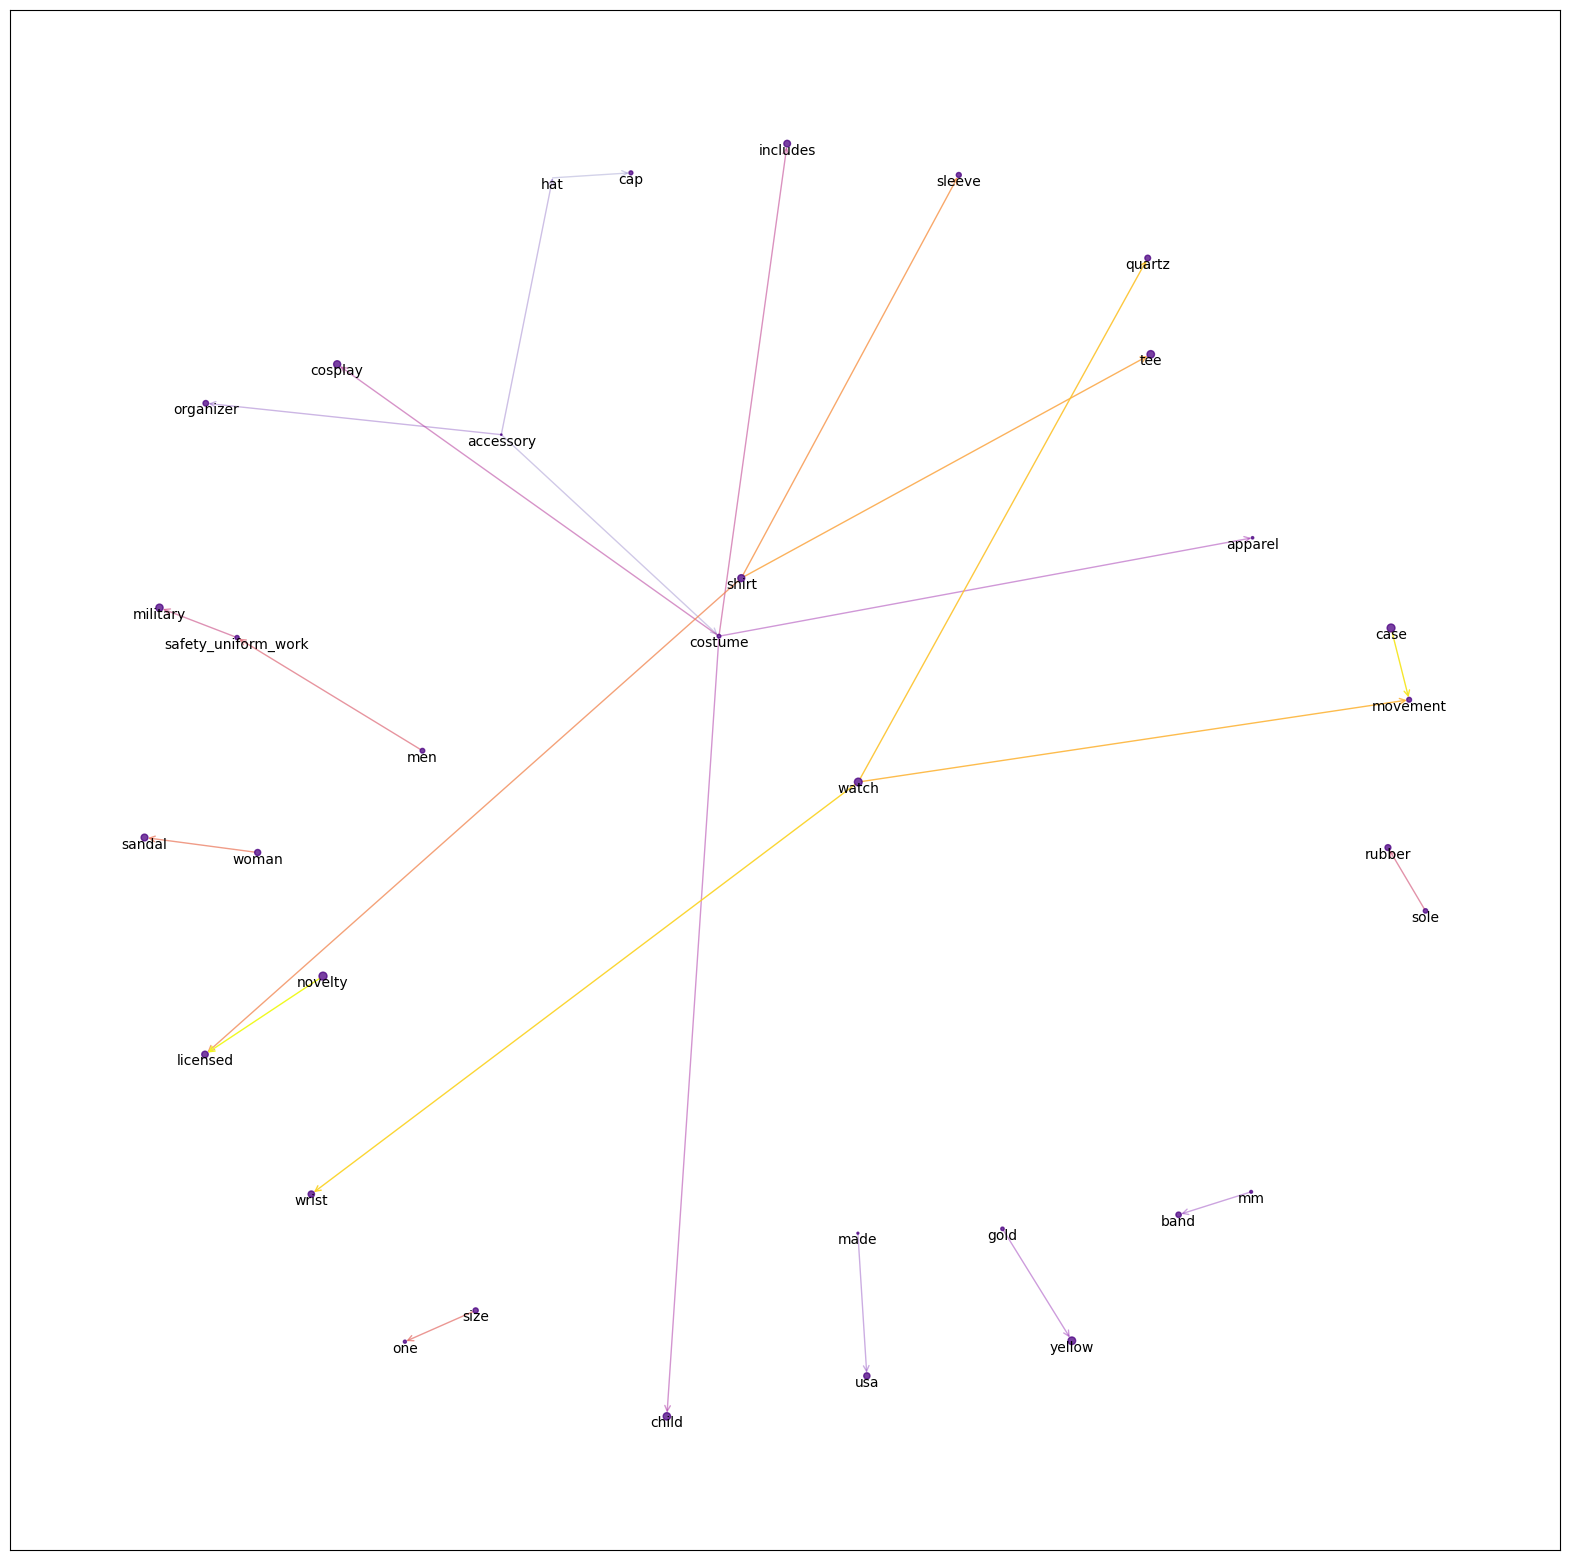

In [22]:
visualise_ontology(u_col['united'], 0.025)